<a href="https://colab.research.google.com/github/oailnivek/ML100-Days/blob/master/homework/Day_077_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [0]:
import os
import keras
from keras.models import Model
from keras.layers import Dense, Input
from keras.optimizers import SGD

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [14]:
def build_mlp():
    """
    Try to build your own model
    """
    
    input_layer = Input([x_train.shape[-1]])
    x = Dense(units=512, activation="relu")(input_layer)
    x = Dense(units=256, activation="relu")(x)
    x = Dense(units=128, activation="relu")(x)
    output_layer = Dense(units=10, activation="softmax")(x)
    
    model = Model(inputs=[input_layer], outputs=[output_layer])
    return model

model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
"""
Compile your model
"""
optimizer = SGD(lr=1e-3)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [16]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 12s 243us/step - loss: 2.2546 - acc: 0.1743 - val_loss: 2.2077 - val_acc: 0.2133
Epoch 2/500
50000/50000 [==============================] - 12s 238us/step - loss: 2.1747 - acc: 0.2246 - val_loss: 2.1462 - val_acc: 0.2396
Epoch 3/500
50000/50000 [==============================] - 12s 241us/step - loss: 2.1218 - acc: 0.2485 - val_loss: 2.0993 - val_acc: 0.2598
Epoch 4/500
50000/50000 [==============================] - 12s 237us/step - loss: 2.0786 - acc: 0.2704 - val_loss: 2.0604 - val_acc: 0.2776
Epoch 5/500
50000/50000 [==============================] - 12s 235us/step - loss: 2.0439 - acc: 0.2867 - val_loss: 2.0288 - val_acc: 0.2890
Epoch 6/500
50000/50000 [==============================] - 12s 237us/step - loss: 2.0150 - acc: 0.2978 - val_loss: 2.0019 - val_acc: 0.3025
Epoch 7/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.9901 - acc: 0.3086 - val_l

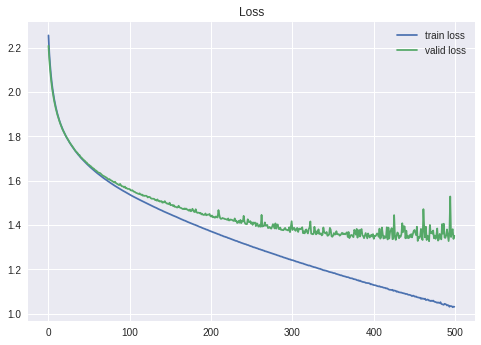

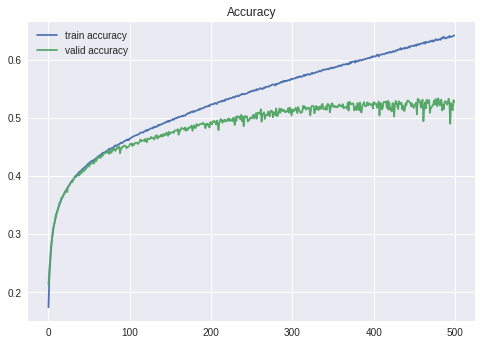

In [17]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()